In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
btc=pd.read_csv('/content/drive/MyDrive/btc.csv')
tsla=pd.read_csv('/content/drive/MyDrive/tesla.csv')

In [ ]:
btc

,date,1. open,2. high,3. low,4. close,5. volume
0,2021-11-11,64891.1375,65596.8454,64098.4651,64785.3826,47337.0
1,2021-11-10,66944.8576,68990.6665,63319.6921,64897.4985,61210.0
2,2021-11-09,67531.9826,68522.0065,66326.9613,66942.3801,52140.0
3,2021-11-08,63283.3131,67772.6291,63283.3068,67532.2386,65777.0
4,2021-11-07,61486.5858,63293.6064,61345.1077,63280.0615,34366.0
...,...,...,...,...,...,...
3700,2011-08-23,11.7000,11.7000,11.7000,11.7000,0.0
3701,2011-08-22,11.7000,11.7000,11.7000,11.7000,0.0
3702,2011-08-21,11.7000,11.7000,11.7000,11.7000,0.0
3703,2011-08-20,11.8500,11.8500,11.1500,11.6900,1.0


In [ ]:
tsla

,date,1. open,2. high,3. low,4. close,5. volume
0,2021-11-11,1102.770,1104.9700,1054.68,1063.51,22174016.0
1,2021-11-10,1010.410,1078.1000,987.31,1067.95,42802722.0
2,2021-11-09,1173.600,1174.5000,1011.52,1023.50,58525547.0
3,2021-11-08,1149.785,1197.0000,1133.00,1162.94,33445715.0
4,2021-11-05,1228.000,1239.8700,1208.00,1222.09,21628812.0
...,...,...,...,...,...,...
2860,2010-07-06,20.000,20.0000,15.83,16.11,6866900.0
2861,2010-07-02,23.000,23.1000,18.71,19.20,5139800.0
2862,2010-07-01,25.000,25.9200,20.27,21.96,8218800.0
2863,2010-06-30,25.790,30.4192,23.30,23.83,17187100.0


In [ ]:
close_btc=btc['4. close'].values
close_btc=close_btc[::-1]
close_tsla=tsla['4. close'].values
close_tsla=close_tsla[::-1]

In [ ]:
close_btc.shape,close_tsla.shape

((3705,), (2865,))

In [ ]:
close_btc=btc['4. close'].values[:2800]
close_btc=close_btc[::-1]
close_tsla=tsla['4. close'].values[:2800]
close_tsla=close_tsla[::-1]

In [ ]:
from scipy.stats import pearsonr
p_coeef,p_value=pearsonr(close_btc,close_tsla)

In [ ]:
p_coeef,p_value

(0.7025828039642034, 0.0)

In [ ]:
corr_pcoeef=[]
corr_pvalue=[]
for i in range(1,29):
  p_c,p_v=pearsonr(close_btc[i*100-100:100*i],close_tsla[i*100-100:100*i])
  corr_pcoeef.append(p_c)
  corr_pvalue.append(p_v)

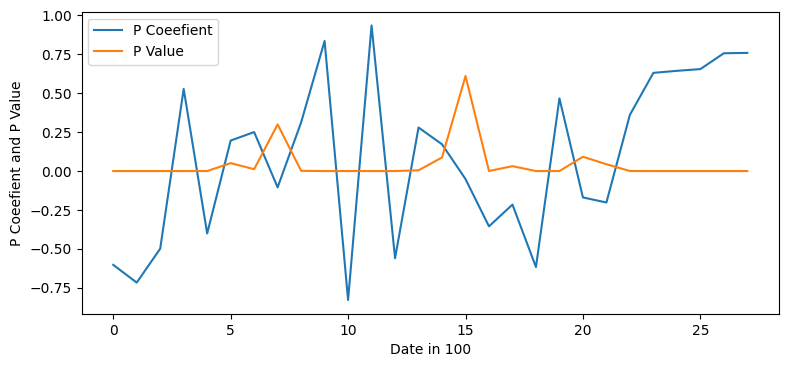

In [ ]:
plt.figure(figsize=(9,4),dpi=100)
plt.plot(corr_pcoeef,label='P Coeefient')
plt.plot(corr_pvalue,label='P Value')
plt.ylabel('P Coeefient and P Value')
plt.xlabel('Date in 100')
plt.legend()
plt.show()

In [ ]:
corr_pcoeef1=[]
corr_pvalue1=[]
for i in range(1,29):
  p_c,p_v=pearsonr(close_btc[:100*i],close_tsla[:100*i])
  corr_pcoeef1.append(p_c)
  corr_pvalue1.append(p_v)

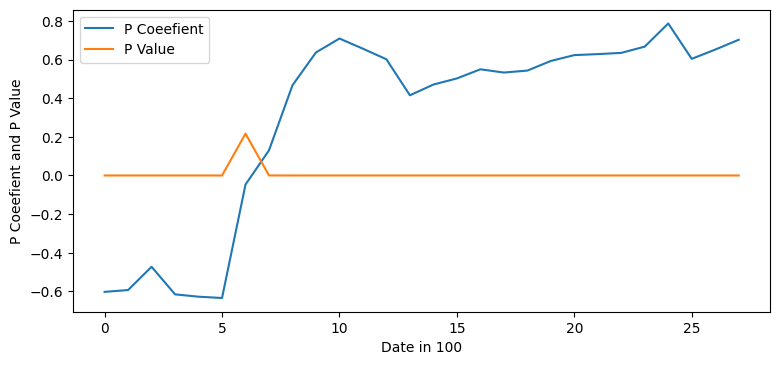

In [ ]:
plt.figure(figsize=(9,4),dpi=100)
plt.plot(corr_pcoeef1,label='P Coeefient')
plt.plot(corr_pvalue1,label='P Value')
plt.ylabel('P Coeefient and P Value')
plt.xlabel('Date in 100')
plt.legend()
plt.show()

In [ ]:
p_coeef,p_value=pearsonr(corr_pcoeef,corr_pcoeef1)
p_coeef,p_value

(0.35554506385392515, 0.06334122954958957)

In [ ]:
def corr_difine(x):
  if 0.5<=x<=1:
    print('کرلشن قوی مستقیم')
  elif 0<=x<0.5:
    print('کرلشن ضعیف مستیقم')
  elif -0.5<=x<0:
    print('کرلشن ضعیف عکس')
  elif -1<=x<-0.5:
    print('کرلشن قوی عکس')

In [ ]:
corr_difine(p_coeef)

کرلشن ضعیف مستیقم


In [ ]:
def corr_difine(x):
  c=0
  if 0.5<=x<=1:
    c=0
  elif 0<=x<0.5:
    c=1
  elif -0.5<=x<0:
    c=2
  elif -1<=x<-0.5:
    c=3
  return c

In [ ]:
corr_difine(p_coeef)

1

In [ ]:
dis_corr=[]
for i in corr_pcoeef:
  dis_corr.append(corr_difine(i))

In [ ]:
dis_corr1=[]
for i in corr_pcoeef1:
  dis_corr1.append(corr_difine(i))

In [ ]:
btc

,date,1. open,2. high,3. low,4. close,5. volume
0,2021-11-11,64891.1375,65596.8454,64098.4651,64785.3826,47337.0
1,2021-11-10,66944.8576,68990.6665,63319.6921,64897.4985,61210.0
2,2021-11-09,67531.9826,68522.0065,66326.9613,66942.3801,52140.0
3,2021-11-08,63283.3131,67772.6291,63283.3068,67532.2386,65777.0
4,2021-11-07,61486.5858,63293.6064,61345.1077,63280.0615,34366.0
...,...,...,...,...,...,...
3700,2011-08-23,11.7000,11.7000,11.7000,11.7000,0.0
3701,2011-08-22,11.7000,11.7000,11.7000,11.7000,0.0
3702,2011-08-21,11.7000,11.7000,11.7000,11.7000,0.0
3703,2011-08-20,11.8500,11.8500,11.1500,11.6900,1.0


In [ ]:
tsla

,date,1. open,2. high,3. low,4. close,5. volume
0,2021-11-11,1102.770,1104.9700,1054.68,1063.51,22174016.0
1,2021-11-10,1010.410,1078.1000,987.31,1067.95,42802722.0
2,2021-11-09,1173.600,1174.5000,1011.52,1023.50,58525547.0
3,2021-11-08,1149.785,1197.0000,1133.00,1162.94,33445715.0
4,2021-11-05,1228.000,1239.8700,1208.00,1222.09,21628812.0
...,...,...,...,...,...,...
2860,2010-07-06,20.000,20.0000,15.83,16.11,6866900.0
2861,2010-07-02,23.000,23.1000,18.71,19.20,5139800.0
2862,2010-07-01,25.000,25.9200,20.27,21.96,8218800.0
2863,2010-06-30,25.790,30.4192,23.30,23.83,17187100.0


In [ ]:
#Main feature
f1=btc['1. open'].values[:2800]
f1=f1[::-1]
f2=btc['2. high'].values[1:2801]
f2=f2[::-1]
f3=btc['3. low'].values[1:2801]
f3=f3[::-1]
f4=btc['5. volume'].values[1:2801]
f4=f4[::-1]
f5=tsla['4. close'].values[1:2801]
f5=f5[::-1]
#Memory feature
f6=btc['1. open'].values[1:2801]
f6=f6[::-1]
f7=btc['2. high'].values[2:2802]
f7=f7[::-1]
f8=btc['3. low'].values[2:2802]
f8=f8[::-1]
f9=btc['5. volume'].values[2:2802]
f9=f9[::-1]
f10=tsla['4. close'].values[2:2802]
f10=f10[::-1]
#target
target=btc['4. close'].values[:2800]
target=target[::-1]
#index
index=btc['date'].values[:2800]
index=index[::-1]

In [ ]:
s={'open':f1,'high -1':f2,'low -1':f3,'volume -1':f4,'tsla close -1':f5,'open -2':f6,'high -2':f7,'low -2':f8,'volume -2':f9,'tsla close -2':f10,'close BTC':target}
data=pd.DataFrame(s,index=index,columns=s.keys())
data

,open,high -1,low -1,volume -1,tsla close -1,open -2,high -2,low -2,volume -2,tsla close -2,close BTC
2014-03-11,638.4000,653.0000,613.0300,9121.0,21.980,620.0200,639.7900,604.5000,9699.0,21.400,629.3900
2014-03-12,628.0200,646.5900,609.0000,13350.0,20.405,638.4000,653.0000,613.0300,9121.0,21.980,632.1000
2014-03-13,631.7200,644.4400,614.1700,9166.0,20.600,628.0200,646.5900,609.0000,13350.0,20.405,634.9500
2014-03-14,634.9500,656.9500,628.8000,12741.0,20.990,631.7200,644.4400,614.1700,9166.0,20.600,641.0100
2014-03-15,641.0200,650.0000,632.0000,6728.0,21.120,634.9500,656.9500,628.8000,12741.0,20.990,630.4200
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-07,61486.5858,61570.5207,60070.6430,33278.0,1229.910,60959.1135,62640.3357,60728.4953,41318.0,1213.860,63280.0615
2021-11-08,63283.3131,63293.6064,61345.1077,34366.0,1222.090,61486.5858,61570.5207,60070.6430,33278.0,1229.910,67532.2386
2021-11-09,67531.9826,67772.6291,63283.3068,65777.0,1162.940,63283.3131,63293.6064,61345.1077,34366.0,1222.090,66942.3801
2021-11-10,66944.8576,68522.0065,66326.9613,52140.0,1023.500,67531.9826,67772.6291,63283.3068,65777.0,1162.940,64897.4985


In [ ]:
x=data.drop('close BTC',axis=1)
y=data['close BTC'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2240, 10), (560, 10), (2240,), (560,))

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

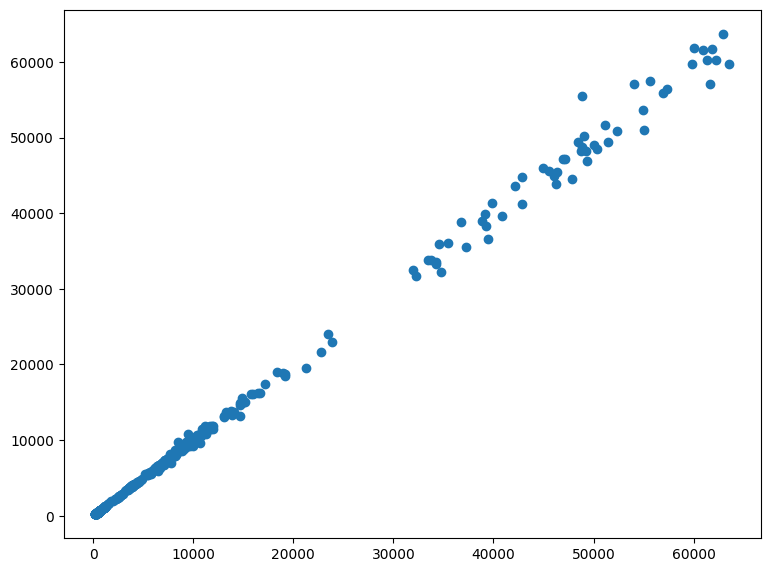

In [ ]:
plt.figure(figsize=(9,7),dpi=100)
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
print('training score :',reg.score(x_train,y_train))
print('testing score :',reg.score(x_test,y_test))

training score : 0.9978788262661895
testing score : 0.9978953996701978


In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

mse=MSE(y_test,y_pred)/len(y_test)
mae=MAE(y_test,y_pred)
mape=MAPE(y_test,y_pred)

print('MSE :',mse,' | MAE : ',mae,' | MAPE : ',mape)

MSE : 714.5558354309595  | MAE :  226.99597948608593  | MAPE :  0.025185239108161266


In [ ]:
data.columns

Index(['open', 'high -1', 'low -1', 'volume -1', 'tsla close -1', 'open -2',
       'high -2', 'low -2', 'volume -2', 'tsla close -2', 'close BTC'],
      dtype='object')

In [ ]:
p=np.array([41477.09,41779.57,40582,52140.0,1028.1,39655,41084,38570,52140.0,1004])
p=p.reshape(-1,10)

In [ ]:
new_predict=reg.predict(p)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
new_predict

array([41022.36607204])

In [ ]:
new_predict-mse

array([40307.81023661])

In [ ]:
new_predict+mse

array([41736.92190747])

------Star-----

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Stars.csv')
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [ ]:
c=df['Color'].values
q=np.unique(c)
q

array(['Blue', 'Blue White', 'Blue white', 'Blue-White', 'Blue-white',
       'Orange', 'Orange-Red', 'Pale yellow orange', 'Red', 'White',
       'White-Yellow', 'Whitish', 'Yellowish', 'Yellowish White', 'white',
       'yellow-white', 'yellowish'], dtype=object)

In [ ]:
df=df.replace({'Blue':0, 'Blue White':1, 'Blue white':1, 'Blue-White':1, 'Blue-white':1,
       'Orange':3, 'Orange-Red':4, 'Pale yellow orange':5, 'Red':6, 'White':7,
       'White-Yellow':8, 'Whitish':9, 'Yellowish':10, 'Yellowish White':8, 'white':7,
       'yellow-white':8, 'yellowish':10})

In [ ]:
sp=df['Spectral_Class'].values
qq=np.unique(sp)
qq

array(['A', 'B', 'F', 'G', 'K', 'M', 'O'], dtype=object)

In [ ]:
df=df.replace({'A':0, 'B':1, 'F':2, 'G':3, 'K':4, 'M':5, 'O':6})

In [ ]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,6,5,0
1,3042,0.000500,0.1542,16.60,6,5,0
2,2600,0.000300,0.1020,18.70,6,5,0
3,2800,0.000200,0.1600,16.65,6,5,0
4,1939,0.000138,0.1030,20.06,6,5,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,6,5
236,30839,834042.000000,1194.0000,-10.63,0,6,5
237,8829,537493.000000,1423.0000,-10.73,7,0,5
238,9235,404940.000000,1112.0000,-11.23,7,0,5


In [ ]:
from sklearn.preprocessing import scale
x=df.drop('Temperature',axis=1)
y=df['Temperature'].values
x=scale(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
reg_star=LinearRegression()
reg_star.fit(x_train,y_train)
y_pred=reg_star.predict(x_test)

In [ ]:
mse_star=MSE(y_test,y_pred)
mae_star=MAE(y_test,y_pred)
mape_star=MAPE(y_test,y_pred)

In [ ]:
mse_star,mae_star,mape_star

(43862193.72353018, 4408.303038676837, 0.4827068235632986)

In [ ]:
xx=[0,40000]
yy=[0,40000]

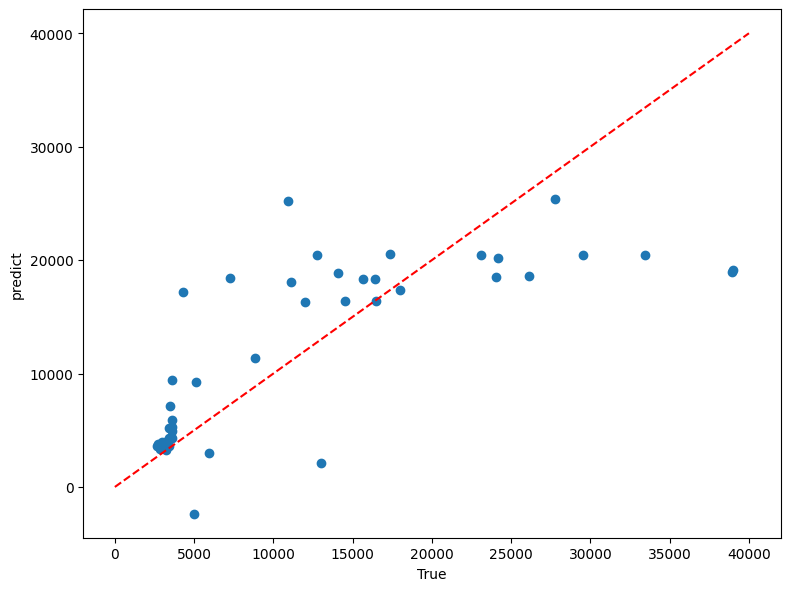

In [ ]:
plt.figure(figsize=(9,7),dpi=100)
plt.scatter(y_test,y_pred)
plt.plot(xx,yy,'r--')
plt.xlabel('True')
plt.ylabel('predict')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(x,y)
coeef=lasso.coef_

In [ ]:
coeef

array([ 1526.06074185,  -675.62408714, -1921.93310693, -5956.8264977 ,
       -1503.75208188,  -779.0869841 ])

In [ ]:
df.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

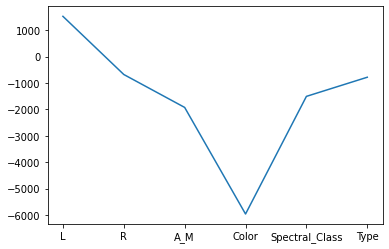

In [ ]:
ii=['L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type']
plt.plot(ii,coeef)